In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('social_media_posts.xlsx', sheet_name='Posts')
print(df.head())

   PostID Username                                            Content  \
0       1    user1     I just bought this new phone and it's amazing!   
1       2    user2  The recent update has so many bugs. Very disap...   
2       3    user3  Love the new features in this app. Makes my li...   
3       4    user4  This product is not worth the price. Extremely...   
4       5    user5  Just tried this new restaurant, and the food w...   

        Date  Likes  Comments  Shares   Platform  Sentiment Score  
0 2024-05-20    150        20       5    Twitter              NaN  
1 2024-05-21     45        15       2   Facebook              NaN  
2 2024-05-22    200        30      10  Instagram              NaN  
3 2024-05-23     60        25       3    Twitter              NaN  
4 2024-05-24    250        40      20   Facebook              NaN  


In [3]:
df = df.dropna(subset=['Content'])
posts = df['Content'].tolist()
df.to_excel('cleaned_social_media_posts.xlsx', index=False)

In [4]:
from openai import OpenAI

In [5]:
def analyze(post):
    try: 
        client = OpenAI()
        completion = client.chat.completions.create(
        messages=[
                {"role": "system", "content": "You are a helpful assistant."},
                {"role": "user", "content": f"Analyze the sentiment of the following post: {post}"}
            ],
        model="gpt-3.5-turbo",
        )
        sentiment = completion.choices[0].message.content.strip()
        return sentiment
    except Exception as e:
            return f"Error: {e}"

In [6]:
sample = "I love this new product! It's amazing!"
print(analyze(sample))

The sentiment of the post is positive. The user expresses excitement and admiration toward the new product, indicating a strong sense of satisfaction and enthusiasm.


In [8]:
sentiments = []
for post in posts:
    sentiment = analyze(post)
    sentiments.append(sentiment)

In [10]:
def get_simple_sentiment(sentiment):
    if 'positive' in sentiment.lower():
        return 'positive'
    elif 'negative' in sentiment.lower():
        return 'negative'
    else:
        return 'neutral'
 
simplified_sentiments = [get_simple_sentiment(s) for s in sentiments]

In [11]:
print(simplified_sentiments)

['positive', 'negative', 'positive', 'negative', 'positive', 'positive', 'negative', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'positive', 'negative', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'positive', 'negative', 'positive', 'positive', 'negative', 'positive', 'positive', 'negative', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'positive', 'negative', 'positive', 'positive', 'negative']


In [12]:
sentiment_scores = [1 if s == 'positive' else -1 if s == 'negative' else 0 for s in simplified_sentiments]

In [13]:
df['Sentiment'] = simplified_sentiments
df['Sentiment Score'] = sentiment_scores

In [14]:
df.to_excel('sentiment_analysis_results.xlsx', index=False)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

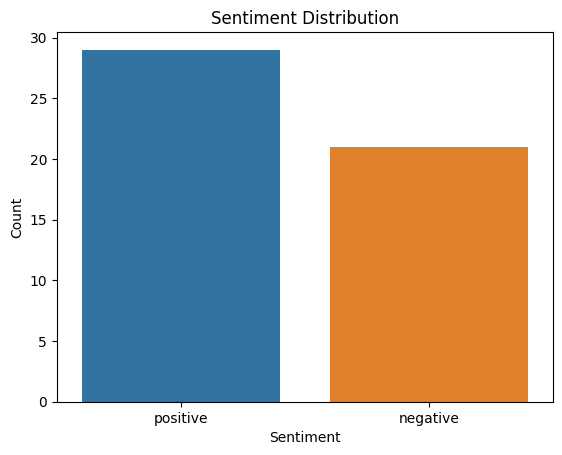

In [16]:
sentiment_counts = df['Sentiment'].value_counts()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.savefig('sentiment_distribution.png')
plt.show()

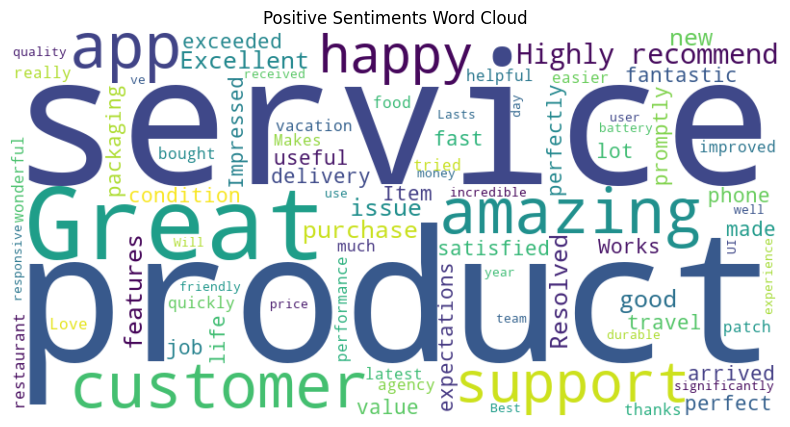

In [17]:
positive_posts = ' '.join(df[df['Sentiment'] == 'positive']['Content'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_posts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiments Word Cloud')
plt.savefig('positive_wordcloud.png')
plt.show()

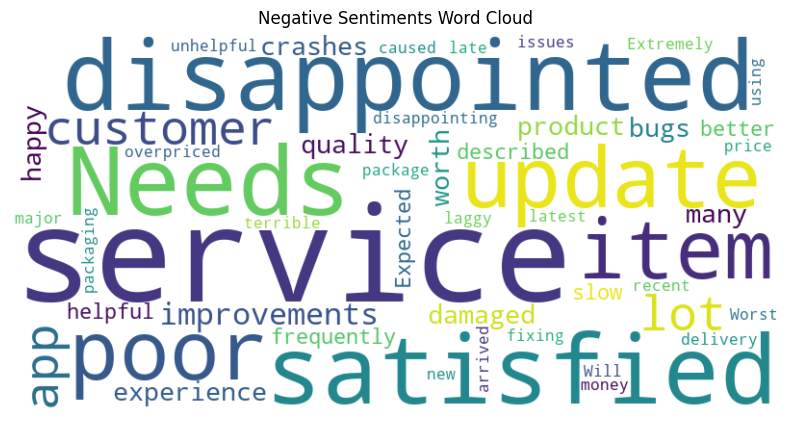

In [18]:
negative_posts = ' '.join(df[df['Sentiment'] == 'negative']['Content'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_posts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiments Word Cloud')
plt.savefig('negative_wordcloud.png')
plt.show()

In [ ]:
sentiment_counts.plot(kind='bar').get_figure().savefig('sentiment_distribution.png')

In [ ]:
from IPython.display import Image
display(Image('sentiment_distribution.png'))
display(Image('positive_wordcloud.png'))
display(Image('negative_wordcloud.png'))